In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
#Pkg.add(["ForwardDiff", "Plots"])
using LinearAlgebra, ForwardDiff, Plots

  Activating project at `~/PhD-Projects/2022-23-numericsofml/03_Exercises/06_ODEfilters`


# Exercise Sheet 6 - Coding Exercise

First of all, please provide your name and matriculation number here:
- Name: 
- Matriculation Number:

This notebook is meant as a starting point for your extended Kalman ODE filter. It provides the building blocks for building a filter, source code for the initial value problem, and the transitions for the one-dimensional 2-times Integrated Wiener process prior. 

**Task**:
Your task is to implement the extended Kalman ODE filter and smoother, and then use it to solve the Lotka--Volterra ODE. Plot the results for both the filter and smoother, and for two different step sizes: One that leads to noticeable approximation error where the uncertainty estimates can be seen, and one that leads to a more "correct" result.
*Don't forget to calibrate the solution.*

Please feel free to change all the code, e.g. in case you want to use Python instead of Julia! *Independently on how you choose to tackle this exercise, you are expected to provide the plots of the probabilistic numerical solutions at the end, computed with an extended Kalman ODE filter and smoother as presented in the lecture.* 
Please hand in the result as a pdf-exported Jupyter notebook.

## The Lotka-Volterra Initial Value Problem
An initial value problem consists of a vector field `f`, an initial value `x0`, and a time span $(0,T)$ (`tspan`); all defined below:

In [2]:
α, β, γ, δ = 1.5, 1.0, 3.0, 1.0

f(x, t) = [α * x[1] - β * x[1] * x[2]
           -γ * x[2] + δ * x[1] * x[2]]

x0 = [1.0, 1.0]

tspan = (0.0, 10.0)

(0.0, 10.0)

Here is a minimal forward Euler implementation to plot the (approximate) solution:
> Remember that the Julia syntax `a//b` is for `Fractional` numbers, i.e. the mathematical object $\frac{a}{b}$. This mitigates round-off errors in the time steps and does not exist in Python

In [3]:
# Auxiliary function to stack a vector of vectors into a matrix
vecvec2mat(vecs) = hcat(vecs...)'

vecvec2mat (generic function with 1 method)

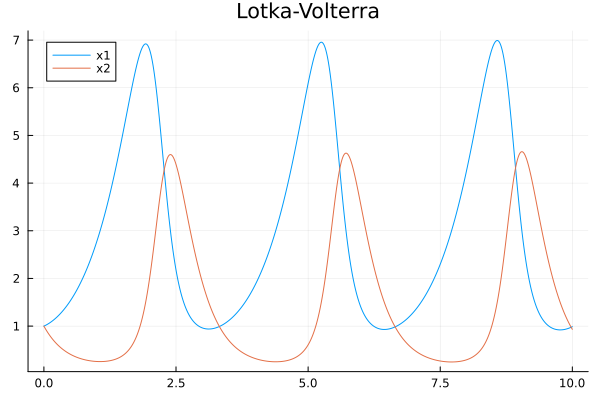

In [4]:
# Simple euler demo
function euler(f, x0, tspan; dt=1//1000)
    xs, ts = [x0], [tspan[1]]
    x = x0
    for t in tspan[1]:dt:(tspan[2]-dt)
        x = x + dt * f(x, t)
        push!(xs, x)
        push!(ts, t+dt)
    end
    return xs, ts
end
xs, ts = euler(f, x0, tspan; dt=1//1000)
xs_mat = vecvec2mat(xs) 
plot(ts, xs_mat, title="Lotka-Volterra", label=["x1" "x2"])

(note how the forward Euler has noticeable error already for step sizes `dt=1//100`!)

## Building an extended Kalman ODE filter
In this section you have to
1. construct the state-space model: the prior transitions and projection matrices, and the initial distribution
2. write the `extended_kalman_ode_filter` function

> Replace `missing` with your solution.

### The Prior
Here is the 2-times integrated Wiener process in one dimension, as shown in the lecture:

In [5]:
# From the slides: one-dimensional 2-times integrated Wiener process transitions
A_1d(h) = [
    1 h h^2/2
    0 1 h
    0 0 1
]
Q_1d(h) = [
    h^5/20 h^4/8 h^3/6
    h^4/8 h^3/3 h^2/2
    h^3/6 h^2/2 h
]
E0_1d = [1 0 0]
E1_1d = [0 1 0]

1×3 Matrix{Int64}:
 0  1  0

Implement the corresponding parts for a two-dimensional system.
Tipp: Use [`LinearAlgebra.kron`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.kron)

In [6]:
# TODO: Transitions and projections in two dimensions:
A(h) = missing
Q(h) = missing
E0 = missing
E1 = missing

missing

### Initial Distribution
Initialize $X(0)$ with a standard Gaussian:

In [7]:
# Initial distribution
# TODO:
μ0 = missing
Σ0 = missing

missing

## Extended Kalman ODE filter - Implementation
**!!This is one of the main tasks in this exercise!!**

Implement the extended Kalman ODE filter, as shown in the lecture.
Follow the pseudo-code from the slides, and use the following building blocks:

In [8]:
function kf_predict(μ, Σ, A, Q)
    μ = A * μ
    Σ = A * Σ * A' + Q
    return μ, Σ
end

function kf_update(μ, Σ, H, R, y)
    S = H * Σ * H' + R
    K = Σ * H' / Symmetric(S)
    μ = μ + K * (y - H * μ)
    Σ = Σ - K * S * K'
    return μ, Σ
end

function ekf_update(μ, Σ, h, R, y)
    ŷ = h(μ)
    H = ForwardDiff.jacobian(h, μ)
    S = H * Σ * H' + R
    K = Σ * H' / Symmetric(S)
    μ = μ + K * (y - ŷ)
    Σ = Σ - K * S * K'
    σ²_increment = missing # implement the calibration formula
    # careful: the ODE is two dimensional!
    return μ, Σ, σ²_increment
end

# The smoother step is not provided; you have to implement it on your own!

ekf_update (generic function with 1 method)

In [9]:
function extended_kalman_ode_filter(μ0, Σ0, A, Q, f, x0, ts, E0, E1; smooth=true)
    # TODO
    # You can take inspiration from the `euler` function above
    filter_estimates = []
    μ, Σ = missing, missing
    push!(filter_estimates, (μ, Σ)) # suggested format: return a list of tuples
    
    # smooth
    if smooth
    end
    
    # calibrate
    
    return filter_estimates
end

extended_kalman_ode_filter (generic function with 1 method)

## Solve the Lotka-Volterra problem with the extended Kalman ODE filter
Now apply the algorithm to solve the ODE:

In [10]:
dt = 1//100 # adjust this as you see appropriate
ts = tspan[1]:dt:tspan[2]

filter_estimates = extended_kalman_ode_filter(μ0, Σ0, A, Q, f, x0, ts, E0, E1)

1-element Vector{Any}:
 (missing, missing)

Plot the results:

In [11]:
# TODO: plot the results
means = missing
standard_deviations = missing
#plot(ts, means, ribbon=1.96standard_deviations, fillalpha=0.2)

missing

**Please provide 4 results:** Filter & smoother, for 2 different step-sizes each!